In [1]:
# Checkout www.pygimli.org for more examples


# VES inversion for a blocky model

This tutorial shows how an built-in forward operator is used for inversion.
A DC 1D (VES) modelling is used to generate data, noisify and invert them.


We import numpy, matplotlib and the 1D plotting function



In [2]:
import numpy as np
import pygimli as pg
from pygimli.physics import VESManager

some definitions before (model, data and error)



In [3]:
ab2 = np.logspace(-0.5, 2.5, 40)  # AB/2 distance (current electrodes)

define a synthetic model and do a forward simulatin including noise



In [4]:
synres = [100., 500., 30., 800.]  # synthetic resistivity
synthk = [0.5, 3.5, 6.]  # synthetic thickness (nlay-th layer is infinite)

the forward operator can be called by f.response(model) or simply f(model)



In [5]:
synthModel = synthk + synres  # concatenate thickness and resistivity
ves = VESManager()
rhoa, err = ves.simulate(synthModel, ab2=ab2, mn2=ab2/3,
                         noiseLevel=0.03, seed=1337)

In [6]:
ves.invert(data=rhoa, error=err, ab2=ab2, mn2=ab2/3,
           nLayers=4,
           # startModel=[3]*3+[100]*4,
           lam=1000, lambdaFactor=0.8
           )

21/08/23 - 12:39:32 - pyGIMLi - WARNING - No data error given, set Fallback set to 1%
21/08/23 - 12:39:32 - pyGIMLi - INFO - Created startmodel from forward operator: 7 [0.05270462766947299, 1.7730372306810813, 61.41981134501704, 222.62223268496984, 222.62223268496984, 222.62223268496984, 222.62223268496984]


7 [0.4825899923633823, 3.303908903843236, 8.495898119802563, 96.6900665881485, 508.3951691730316, 41.492068150044204, 835.2425040402376]

show estimated&synthetic models and data with model response in 2 subplots



(<Axes: xlabel='Apparent resistivity ($\\Omega$m)', ylabel='AB/2 (m)'>, None)

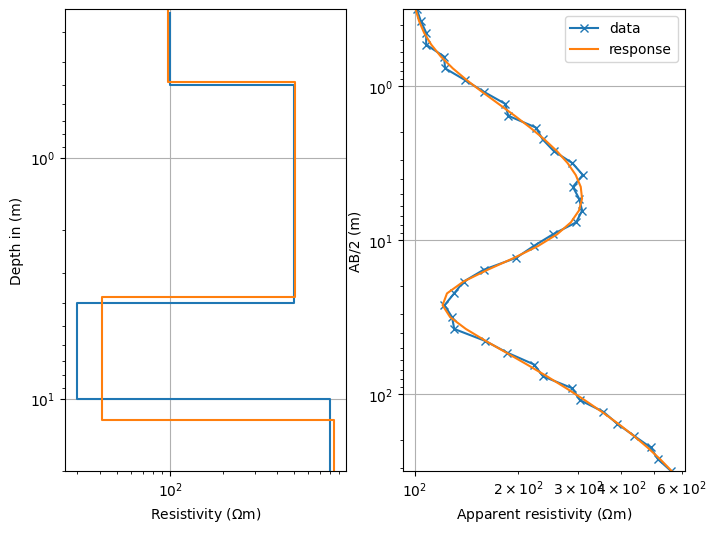

In [7]:
fig, ax = pg.plt.subplots(ncols=2, figsize=(8, 6))  # two-column figure
ves.showModel(synthModel, ax=ax[0], label="synth", plot="semilogy", zmax=20)
ves.showModel(ves.model, ax=ax[0], label="model", zmax=20)
ves.showData(rhoa, ax=ax[1], label="data", color="C0", marker="x")
ves.showData(ves.inv.response, ax=ax[1], label="response", color="C1")